In [233]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [235]:
base_dir = '2025-12-09_train' # one subject

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/one_subject.csv',
    output_func=['softplus', 'pow10'],
    output_scale=[1.0, 1000.],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [4]:
base_dir = '2025-12-16_train' # ten subjects

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/ten_subjects.csv',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid)

16

In [5]:
base_dir = '2025-01-05_train' # full dataset

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_func={output_func} \\
    --set training.model.output_bias={output_bias} \\
    --set training.model.output_scale={output_scale} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2025-11-20_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/subjects.csv',
    variant='2025-01-05',
    output_func=['pow10'],
    output_bias=[1.0, 3.0],
    output_scale=[1.0, 0.1],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [4]:
base_dir = '2026-01-27_train' # new config file, updated/fixed uniform + seeded material sampling, DICE score, etc. try bounds modes.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.bounds_mode={bounds_mode} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    bounds_mode=['hard', 'soft', 'none'],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 12

12

In [5]:
base_dir = '2026-01-28_train' # try different input shifts, revert output shift/scale

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --mem=32G
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects={subjects} \\
    --set dataset.examples.variant={variant} \\
    --set training.model.output_shift={output_shift} \\
    --set training.model.output_scale={output_scale} \\
    --set training.model.input_shift={input_shift} \\
    --set training.trainer.supervised={supervised} \\
    --set training.physics_adapter.rho_known={rho_known}

'''
name_format = '{params_hash}'

grid = ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='basic',
    output_shift=[3.0],
    output_scale=[0.1],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
) + ps.param_grid(
    config='2026-01-15_config.yaml',
    subjects='/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv',
    variant='2026-01-15',
    output_mode='stats',
    output_shift=[3.4863],
    output_scale=[0.3271],
    input_shift=[0.0, 1.0],
    supervised=[True, False],
    rho_known=[True, False],
)
len(grid) # 16

16

In [236]:
#base_dir = '2026-02-02_train' # new config file: batch size 2, input normalization + output heads, segmentation, model arch
#base_dir = '2026-02-04_train' # task spec- segmentation and other tasks, compare dataset size. lr 1e-3, batch size 1.
#base_dir = '2026-02-05_train' # same tasks + data sizes, try noise less variant + augmentation, eval on train.
#base_dir = '2026-02-10_train' # RGB image generation variants- mesh alignment was broken by data augmentation.
#base_dir = '2026-02-17_train' # fixed data augmentation, multi-param prediction tasks. full dataset only.
base_dir = '2026-02-20_train' # TV regularization weight. full dataset, E-only target, using mean-std image variant.

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:v100-32:1
#SBATCH --cpus-per-task=5
#SBATCH --mem=63000M
#SBATCH -x v018
#SBATCH -t 24:00:00

source ~/.bashrc
set -eo pipefail

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/train.py {config} \\
    --set dataset.examples.subjects=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/{subjects} \\
    --set dataset.selectors.input_image={image} \\
    --set training.task.inputs=[{input}] \\
    --set training.task.targets=[{target}] \\
    --set training.task.losses={{}} \\
    --set training.task.losses.{loss_target}={loss} \\
    --set training.trainer.num_epochs={epochs} \\
    --set training.pde_solver.tv_reg_weight={tv_reg_weight}

'''
name_format = '{params_hash}'

image_vars = [
    #'min_max-0',
    #'min_max-1',
    #'mean_std-0', 
    'mean_std-1',
]
tasks = [
    #('image', 'material', 'CE'),
    #('image', 'E', 'MSE'),
    ('image', 'E', 'sim'),
    #('image', 'E,nu', 'sim'),
    #('image', 'E,rho', 'sim'),
    #('image', 'E,nu,rho', 'sim')
]
grid = []

for image in image_vars:
    for task in tasks:
        p = base.copy()
        p['image']  = image
        p['input']  = task[0]
        p['target'] = task[1]
        p['loss_target'] = task[1].split(',')[0]
        p['loss']   = task[2]
        grid.extend(ps.param_grid(
            config='2026-02-02_config.yaml',
            subjects='2026-01-26_preprocessed.csv',
            epochs=100,
            image=image,
            input=task[0],
            target=task[1],
            loss_target=task[1].split(',')[0],
            loss=task[2],
            tv_reg_weight=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 0]
        ))

for p in grid:
    print(p)

len(grid)

{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'mean_std-1', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'sim', 'tv_reg_weight': 0.01}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'mean_std-1', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'sim', 'tv_reg_weight': 0.001}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'mean_std-1', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'sim', 'tv_reg_weight': 0.0001}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'mean_std-1', 'input': 'image', 'target': 'E', 'loss_target': 'E', 'loss': 'sim', 'tv_reg_weight': 1e-05}
{'config': '2026-02-02_config.yaml', 'subjects': '2026-01-26_preprocessed.csv', 'epochs': 100, 'image': 'mean_std-1', 'input': 'image', 'target': 'E', 'loss_tar

8

In [237]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.loss,params.tv_reg_weight,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at
0,f9ae18e0bc4d1122,RUNNING,1,37664020,v015,8:56:32,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-02,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
1,0dad90d006d6bd7b,RUNNING,1,37664021,v017,8:56:32,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-03,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
2,85d852f76aaa8189,RUNNING,1,37664022,v017,8:56:32,"timer: {'t_delta': 0.0008, 'curr_alloc': 0.02,...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-04,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
3,9cbc3ad10b7a6618,RUNNING,1,37664023,v008,8:52:33,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-05,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
4,cf5e8d7d2eb48c0d,RUNNING,1,37664024,v010,8:52:33,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-06,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
5,2d69f56fdce106da,RUNNING,1,37664025,v010,8:52:33,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-07,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
6,aec53f83f156a41b,RUNNING,1,37664026,v022,8:52:33,[Epoch 7 | Val batch 38] start\nload_data: {'t...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-08,False,None,None,NaN,2026-02-21T11:17:49,status,None,None
7,1eaee991da1764d7,PENDING,2,37672374,(None),0:00,None,None,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,0.000000e+00,False,None,None,NaN,2026-02-21T11:17:49,status,True,2026-02-21T10:08:14


In [240]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs = ps.collect(jobs)
jobs.groupby(['params.tv_reg_weight', 'job_state'])[['job_name']].agg(['count', set])

job_name                    
                                  count                 set
params.tv_reg_weight job_state                             
0.000000e+00         FAILED           1  {1eaee991da1764d7}
1.000000e-08         RUNNING          1  {aec53f83f156a41b}
1.000000e-07         RUNNING          1  {2d69f56fdce106da}
1.000000e-06         RUNNING          1  {cf5e8d7d2eb48c0d}
1.000000e-05         RUNNING          1  {9cbc3ad10b7a6618}
1.000000e-04         RUNNING          1  {85d852f76aaa8189}
1.000000e-03         RUNNING          1  {0dad90d006d6bd7b}
1.000000e-02         RUNNING          1  {f9ae18e0bc4d1122}

In [243]:
query = (
    jobs.job_state.isin(['FAILED'])
)
query_jobs = jobs[query].copy()
#query_jobs['logs.epoch'] = query_jobs.stdout.map(lambda x: int(x.split('[Epoch ')[-1].split(' ', 1)[0]))
query_jobs['logs.error'] = query_jobs.stderr.map(lambda x: x.rstrip().split('\n')[-1])
query_jobs[['job_name', 'job_id', 'node_id', 'runtime', 'job_state', 'logs.error', 'params.image', 'params.target', 'params.loss']]

,job_name,job_id,node_id,runtime,job_state,logs.error,params.image,params.target,params.loss
7,1eaee991da1764d7,37672374,v022,00:00:09,FAILED,SyntaxError: expected ':',mean_std-1,E,sim


In [244]:
print(query_jobs.iloc[0].stderr)

Traceback (most recent call last):
  File "/ocean/projects/asc170022p/mtragoza/lung-project/train.py", line 12, in <module>
    main(sys.argv[1:])
  File "/ocean/projects/asc170022p/mtragoza/lung-project/train.py", line 8, in main
    project.api.run_training(examples, config['training'])
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/api.py", line 138, in run_training
    from . import datasets, models, training, evaluation, physics
  File "/ocean/projects/asc170022p/mtragoza/lung-project/project/training.py", line 500
    def _latest_checkpoint()
                            ^
SyntaxError: expected ':'



In [245]:
jobs.loc[query, 'job_id'] = pd.NA
jobs = ps.submit(jobs)
jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.loss,params.tv_reg_weight,output_exists,output_fsize,output_mtime,array_idx,last_live_at,state_source,finalized,finalized_at
0,f9ae18e0bc4d1122,RUNNING,1,37664020,v015,11:06:14,"[Epoch 7 | Train batch 184] {'loss': 0.0131, '...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-02,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
1,0dad90d006d6bd7b,RUNNING,1,37664021,v017,11:06:14,Loading /ocean/projects/asc170022p/mtragoza/lu...,Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-03,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
2,85d852f76aaa8189,RUNNING,1,37664022,v017,11:06:14,"[Epoch 8 | Train batch 294] {'loss': 0.0, 'los...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-04,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
3,9cbc3ad10b7a6618,RUNNING,1,37664023,v008,11:02:15,"[Epoch 7 | Train batch 590] {'loss': 0.0149, '...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-05,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
4,cf5e8d7d2eb48c0d,RUNNING,1,37664024,v010,11:02:15,"[Epoch 7 | Train batch 580] {'loss': 0.0, 'los...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-06,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
5,2d69f56fdce106da,RUNNING,1,37664025,v010,11:02:15,"forward: {'t_delta': 0.5166, 'curr_alloc': 1...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-07,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
6,aec53f83f156a41b,RUNNING,1,37664026,v022,11:02:15,"forward: {'t_delta': 0.5128, 'curr_alloc': 1...",Clipping input data to the valid range for ims...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,1.000000e-08,False,<NA>,<NA>,NaN,2026-02-21T13:27:31,status,None,None
7,1eaee991da1764d7,SUBMITTED,3,37676522,v022,00:00:09,| └── 'param_specs': dict(len=3)\n | ...,"Traceback (most recent call last):\n File ""/o...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,sim,0.000000e+00,False,<NA>,<NA>,NaN,2026-02-21T11:17:49,history,True,2026-02-21T13:26:57


In [105]:
ps.set_verbose(True)

job_failed = jobs.job_state.isin({'FAILED', 'SUBMITTED'})
jobs.loc[job_failed, 'job_id'] = pd.NA

jobs = ps.submit(
    jobs,
    dry_run=False, 
    account='bio170034p',
    partition='BatComputer',
    gres='gpu:rtx6000:1',
    mem='64000M'
)
jobs

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/logs/%j.out --error=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/logs/%j.err --account=bio170034p --partition=BatComputer --gres=gpu:rtx6000:1 --mem=64000M /ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/690b18d3665be16c/run.sh
Submitted batch job 37341049

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/logs/%j.out --error=/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/logs/%j.err --account=bio170034p --partition=BatComputer --gres=gpu:rtx6000:1 --mem=64000M /ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-02-04_train/5adcb740ee2e0667/run.sh
Submitted batch job 37341050

sbatch --output=/ocean/projects/asc170022p/mtragoza/lung-pro

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.target,params.loss,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,690b18d3665be16c,SUBMITTED,7,37341049,v009,8:37,Loading /ocean/projects/asc170022p/mtragoza/lu...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,2026-02-04T04:10:09,status,True,2026-02-04T03:41:29,False,<NA>,<NA>
1,5adcb740ee2e0667,SUBMITTED,7,37341050,v002,00:03:09,Loading /ocean/projects/asc170022p/mtragoza/lu...,"Traceback (most recent call last):\n File ""/o...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T04:07:34,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
2,6619b15c5a1815c3,SUBMITTED,7,37341051,v002,8:37,Saving outputs/example_metrics.csv\nSaving out...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T04:10:09,status,True,2026-02-04T03:51:09,False,<NA>,<NA>
3,8579f0bdd8182751,SUBMITTED,7,37341052,v003,00:05:23,Loading /ocean/projects/asc170022p/mtragoza/lu...,return _launch_integrate_kernel(\n ...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSRE,NaN,2026-02-04T03:51:09,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
4,b9ca463f8ca2bd39,RUNNING,6,37338216,v013,8:06,40 40 val 0 ... 0.910998 ...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,SIM,NaN,2026-02-04T04:29:38,status,True,2026-02-04T04:07:34,False,<NA>,<NA>
5,7a0398a45ed8cd70,RUNNING,6,37338217,v014,6:19:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,material,CE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T03:41:29,False,<NA>,<NA>
6,2b0ceae37bb84b28,SUBMITTED,7,37341053,v017,00:03:43,Loading /ocean/projects/asc170022p/mtragoza/lu...,"Traceback (most recent call last):\n File ""/o...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T03:45:41,history,True,2026-02-04T04:29:38,False,<NA>,<NA>
7,90eec7f1dc180da6,RUNNING,6,37338219,v015,6:19:17,[Epoch 127 | Val batch 2/5] loss = 5.4137e-02 ...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T03:51:09,False,<NA>,<NA>
8,d7798a44ed7aef06,RUNNING,6,37338220,v015,6:19:17,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,MSRE,NaN,2026-02-04T10:40:49,status,True,2026-02-04T04:10:09,False,<NA>,<NA>
9,0dc7849b822b556a,RUNNING,6,37338221,v016,8:06,Loading /ocean/projects/asc170022p/mtragoza/lu...,self.fig.tight_layout()\n/ocean/projects/asc...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,logE,SIM,NaN,2026-02-04T04:29:38,status,True,2026-02-04T04:07:34,False,<NA>,<NA>


In [14]:
sys.path.append('../..')
import project.visual.matplotlib as mpl_viz
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load training jobs

#base_dir = '2026-02-04_train' # task spec- segmentation and other tasks, compare dataset size. lr 1e-3, batch size 1.
#base_dir = '2026-02-05_train' # same tasks + data sizes, try noise less variant + augmentation, eval on train.
#base_dir = '2026-02-10_train'
base_dir = '2026-02-17_train'

jobs_t = ps.load(base_dir)
ex_df_t = ps.outputs(jobs_t, skip_errors=True, output_name='outputs/example_metrics.csv')
mat_df_t = ps.outputs(jobs_t, skip_errors=True, output_name='outputs/material_metrics.csv')

Job 7baad4dac645ebf2: file not found
Job 7baad4dac645ebf2: file not found


In [17]:
param_cols = ['params.subjects', 'params.target', 'params.loss', 'params.image']

ex_df_t.groupby(param_cols + ['phase'])[['epoch', 'step']].max()

epoch  \
params.subjects             params.target params.loss params.image phase          
2026-01-26_preprocessed.csv E             MSE         mean_std-0   train     18   
                                                                   val       19   
                                                      mean_std-1   train     17   
                                                                   val       18   
                                                      min_max-0    train     17   
                                                                   val       18   
                                                      min_max-1    train     17   
                                                                   val       18   
                                          sim         mean_std-0   train     17   
                                                                   val       18   
                                                      mean_std-1   train     17   
                                                                   val       18   
                                                      min_max-0    train     16   
                                                                   val       17   
                                                      min_max-1    train     17   
                                                                   val       18   
                            E,nu          sim         mean_std-0   train     15   
                                                                   val       16   
                                                      mean_std-1   train      5   
                                                                   val        6   
                                                      min_max-1    train     14   
                                                                   val       15   
                            E,nu,rho      sim         mean_std-0   train      2   
                                                                   val        3   
                                                      mean_std-1   train      5   
                                                                   val        6   
                                                      min_max-0    train     14   
                                                                   val       15   
                                                      min_max-1    train      0   
                                                                   val        1   
                            E,rho         sim         mean_std-0   train     15   
                                                                   val       16   
                                                      mean_std-1   train     15   
                                                                   val       16   
                                                      min_max-0    train     15   
                                                                   val       16   
                                                      min_max-1    train     15   
                                                                   val       16   
                            material      CE          mean_std-0   train      9   
                                                                   val       10   
                                                      mean_std-1   train     10   
                                                                   val       11   
                                                      min_max-0    train     10   
                                                                   val       11   
                                                      min_max-1    train     10   
                                                                   val       11   

                                                                           step  
params.

In [55]:
def assign_cols(row):
    data_path = row['params.subjects']
    data_size = {
        'one_subject.csv': 1,
        'two_subjects.csv': 2,
        'ten_subjects.csv': 10,
        '100_subjects.csv': 100,
        '2026-01-26_preprocessed.csv': 945
    }[data_path]

    image_var = row['params.image']

    input_ = row['params.input']
    target = row['params.target']
    loss   = row['params.loss']
    task_spec = f'({target}) {loss}'
    
    return data_size, image_var, task_spec

ex_df_t[['data_size', 'image_variant', 'task_spec']] = ex_df_t.apply(assign_cols, axis=1, result_type='expand')
mat_df_t[['data_size', 'image_variant', 'task_spec']] = mat_df_t.apply(assign_cols, axis=1, result_type='expand')
ex_df_t

,epoch,phase,batch,step,loss,loss_base,loss_ratio,subject,num_voxels,source_path,...,rho_vox.pcorr,rho_vox.scorr,nu_vox.mean,nu_vox.rms,nu_cell.mean,nu_cell.rms,data_size,image_variant,task_spec,task_spec_s
0,0,val,0,0,4.005254,"(1.7917594909667969,)",2.235375,wss.7fb6049c54bca61895fab40439a8e375,153493,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,945,min_max-0,(material) CE,"('image', 'material', 'CE')"
1,0,val,1,0,5.412548,"(1.7917594909667969,)",3.020801,wss.872cafaa1a4b658878df813b603fccea,70231,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,945,min_max-0,(material) CE,"('image', 'material', 'CE')"
2,0,val,2,0,4.112786,"(1.7917594909667969,)",2.295389,wss.485d9ea2f47335b03e27fc67bf70fa23,140090,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,945,min_max-0,(material) CE,"('image', 'material', 'CE')"
3,0,val,3,0,2.705954,"(1.7917596101760864,)",1.510221,wss.f1ce06c5259f771dc24182d0db4c6889,226245,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,945,min_max-0,(material) CE,"('image', 'material', 'CE')"
4,0,val,4,0,2.312347,"(1.7917594909667969,)",1.290546,wss.972fd47e1680a46619d87fb582c57cdb,282168,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,NaN,NaN,NaN,NaN,NaN,NaN,945,min_max-0,(material) CE,"('image', 'material', 'CE')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225883,5,train,619,3740,0.124917,"(1.0,)",0.124917,wss.fb641fe28d0f5e73d51fce576fbd4600,384100,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.222283,0.116447,0.353028,0.353699,0.350845,0.351115,945,mean_std-1,"(E,nu,rho) sim","('image', 'E,nu,rho', 'sim')"
225884,5,train,620,3741,0.111506,"(1.0,)",0.111506,wss.7301cc092b8be04d952d35aa78d86122,1038357,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.214390,0.076226,0.333725,0.333985,0.332808,0.332906,945,mean_std-1,"(E,nu,rho) sim","('image', 'E,nu,rho', 'sim')"
225885,5,train,621,3742,0.031184,"(1.0,)",0.031184,wss.76e4ce633da40c7c79c6f641119e614e,317184,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.235984,0.132063,0.361686,0.362185,0.359805,0.360032,945,mean_std-1,"(E,nu,rho) sim","('image', 'E,nu,rho', 'sim')"
225886,5,train,622,3743,0.011153,"(1.0,)",0.011153,wss.728233c4904bdc88c6b9525db08731d1,220647,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,0.246821,0.165504,0.369590,0.370297,0.366604,0.366955,945,mean_std-1,"(E,nu,rho) sim","('image', 'E,nu,rho', 'sim')"


In [56]:
## import numpy as np

x_col = 'step'
y_col = 'loss_ratio'
hue_col = 'phase'
row_col = 'task_spec'
col_col = 'image_variant'

row_vals = np.unique(ex_df_t[row_col])
col_vals = np.unique(ex_df_t[col_col])

row_vals, col_vals

(array(['(E) MSE', '(E) sim', '(E,nu) sim', '(E,nu,rho) sim',
        '(E,rho) sim', '(material) CE'], dtype=object),
 array(['mean_std-0', 'mean_std-1', 'min_max-0', 'min_max-1'], dtype=object))

/var/tmp/ipykernel_12506/3666378503.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


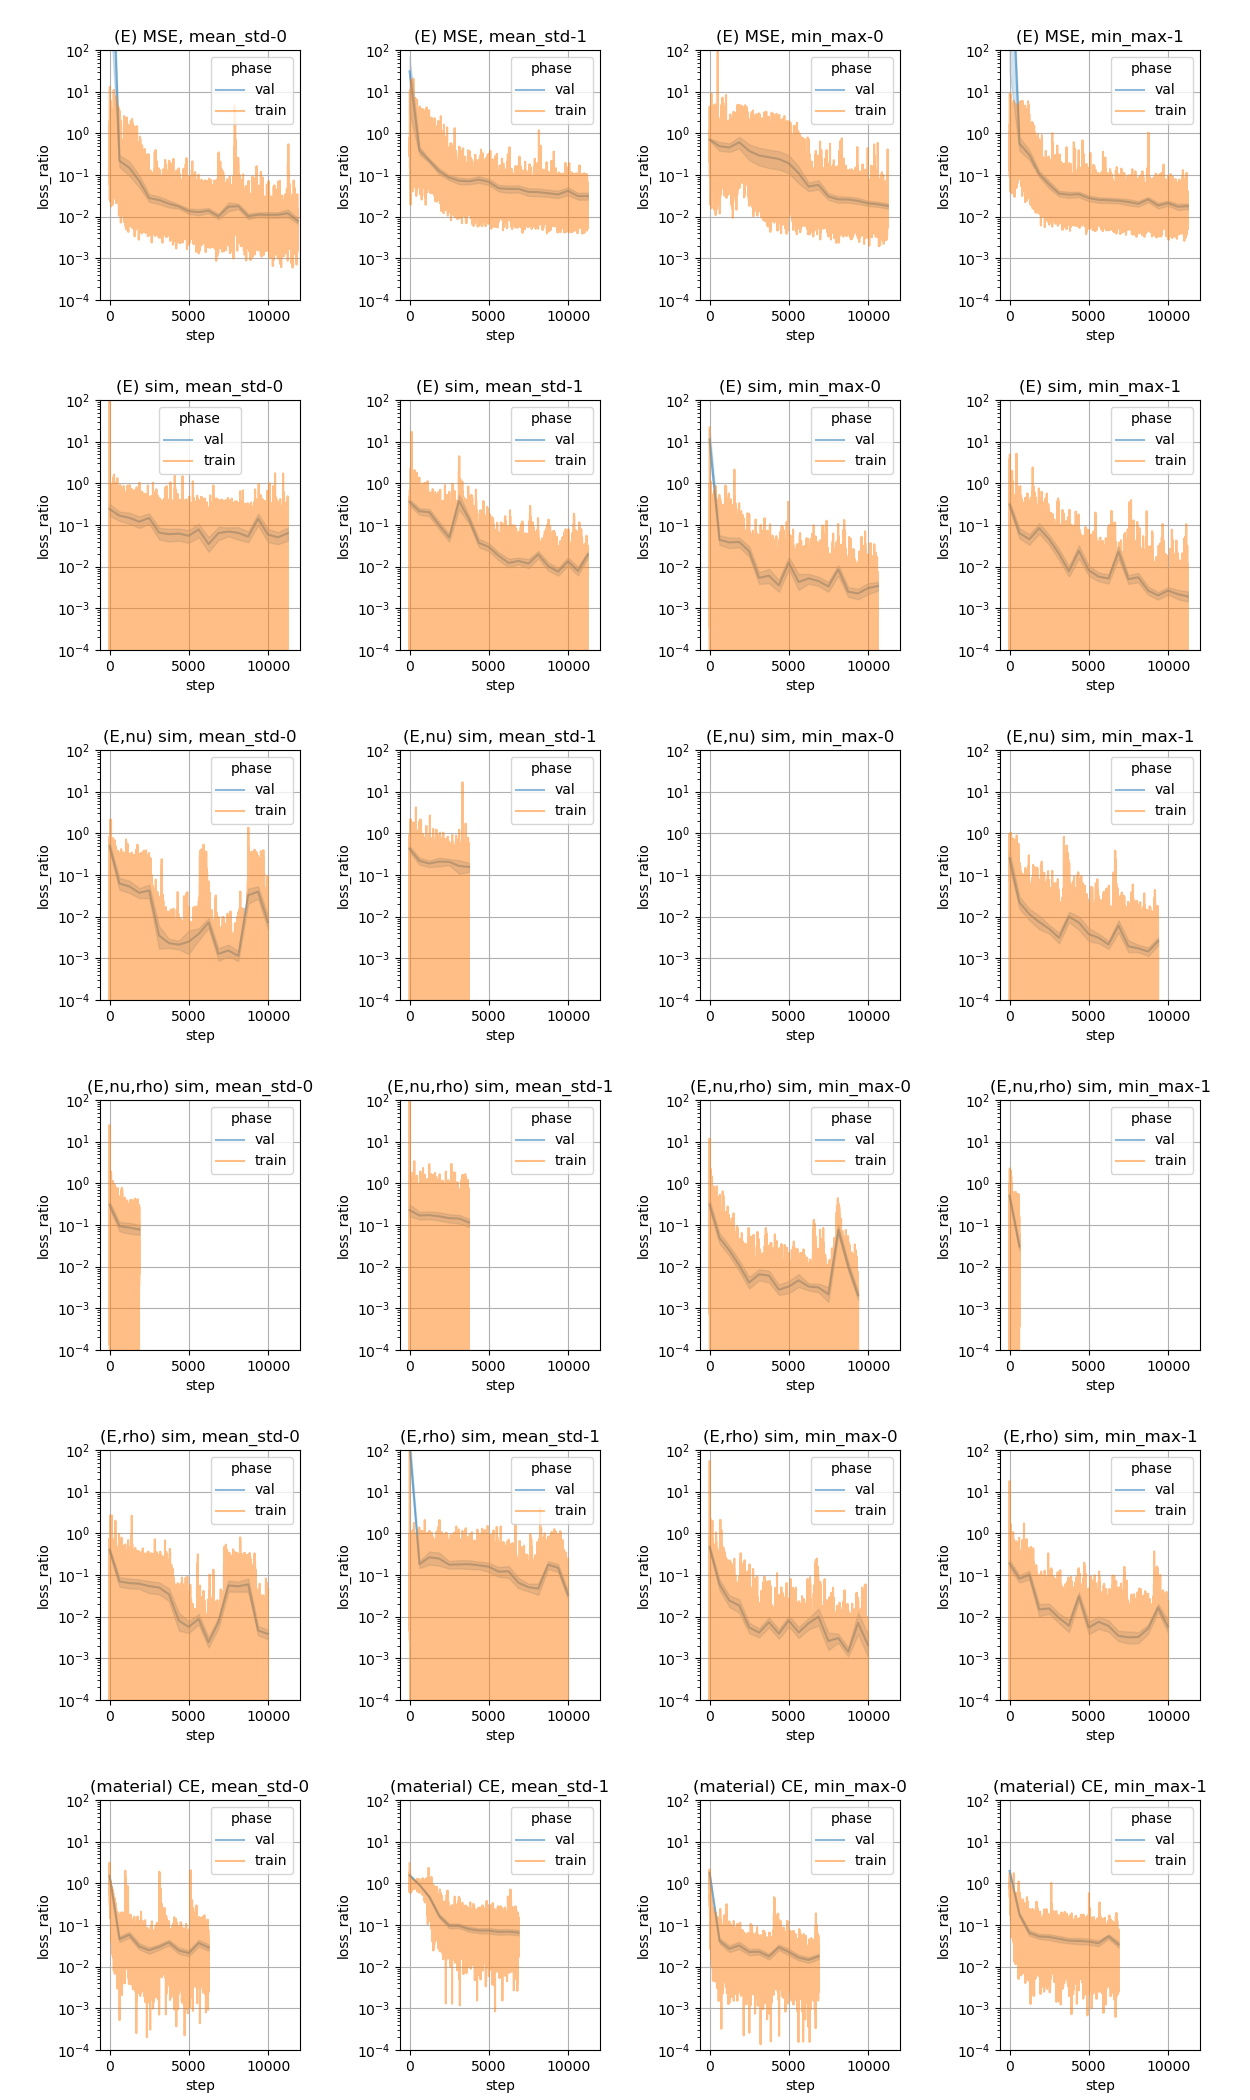

In [57]:
import project
import project.visual.matplotlib as mpl_viz

def lineplot_grid(df, x, y, hue, row, col, xlim=None, ylim=None):
    row_vals = np.unique(df[row])
    col_vals = np.unique(df[col])
    xmin, xmax = xlim or (None, None)
    ymin, ymax = ylim or (None, None)

    fig, axes = mpl_viz.subplot_grid(
        len(row_vals), len(col_vals),
        ax_width=2,
        ax_height=2.5,
        spacing=(1.0, 1.0),
        padding=(1.0, 0.5, 0.5, 0.5)
    )
    for i, row_val in enumerate(row_vals):
        for j, col_val in enumerate(col_vals):
            row_sel = df[row] == row_val
            col_sel = df[col] == col_val
            sns.lineplot(
                df[row_sel & col_sel],
                x=x, y=y, hue=hue,
                ax=axes[i,j],
                alpha=0.5
            )
            axes[i,j].set_title(f'{row_val}, {col_val}')
            axes[i,j].set_yscale('log')
            axes[i,j].set_ylim(ymin, ymax)
            axes[i,j].set_xlim(xmin, xmax)
            axes[i,j].grid('on')

    fig.tight_layout()

lineplot_grid(
    ex_df_t,
    x='step',
    y='loss_ratio',
    hue='phase',
    row='task_spec',
    col='image_variant',
    xlim=(-600, 12000),
    ylim=(1e-4, 1e2)
)

/var/tmp/ipykernel_12506/3666378503.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


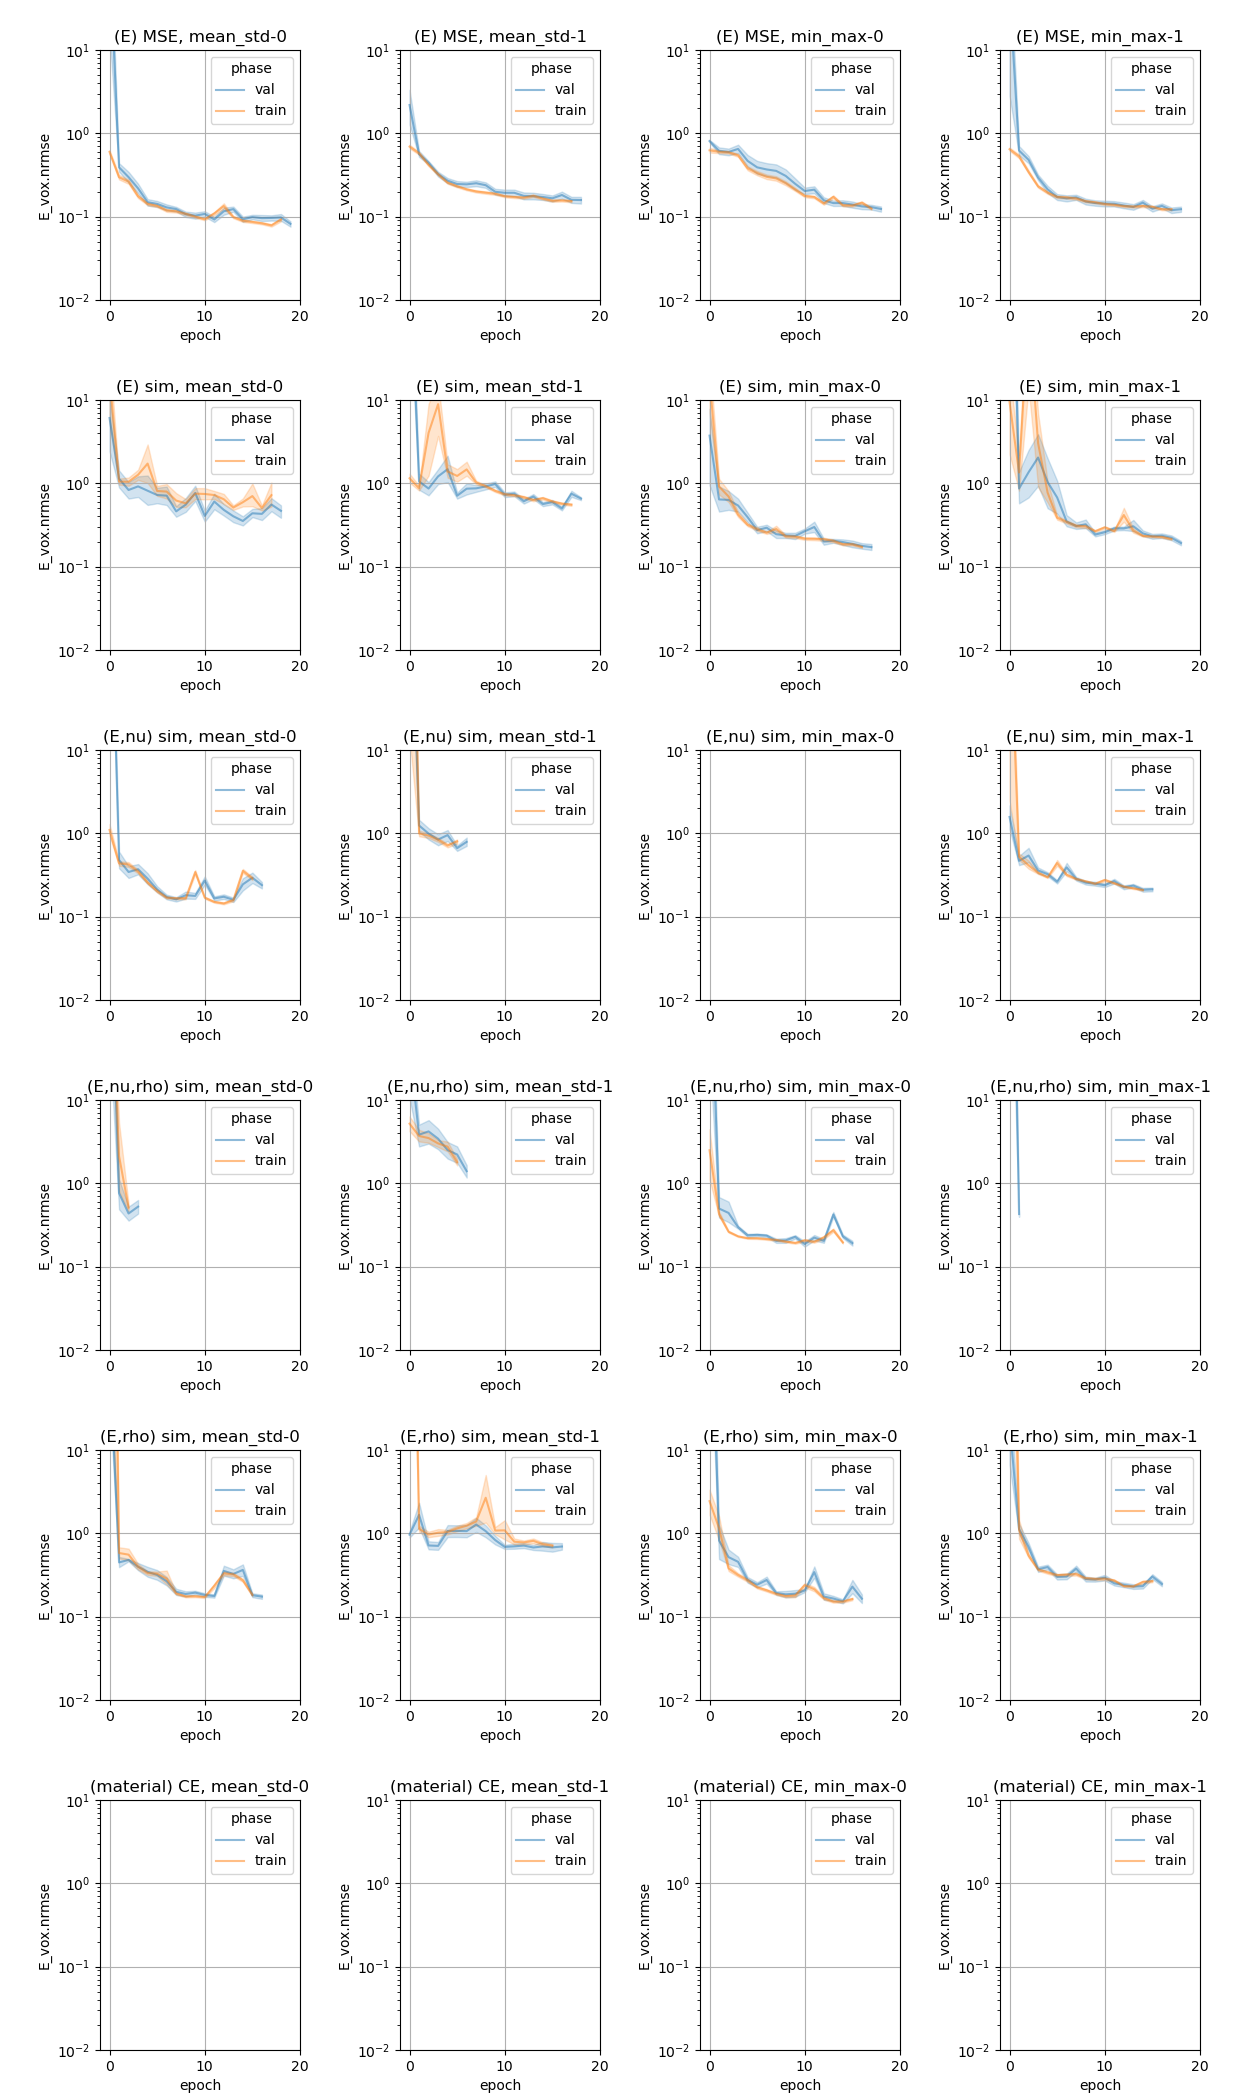

In [59]:
lineplot_grid(
    ex_df_t,
    x='epoch',
    y='E_vox.nrmse',
    hue='phase',
    row='task_spec',
    col='image_variant',
    xlim=(-1, 20),
    ylim=(1e-2, 1e1)
)

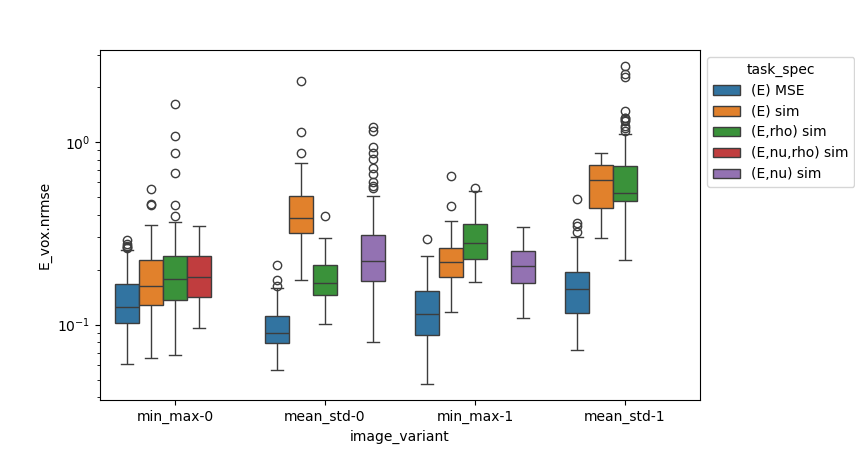

In [76]:
df = ex_df_t

fig, axes = mpl_viz.subplot_grid(
    1, 1,
    ax_width=6,
    ax_height=3.5,
    spacing=(1.0, 1.0),
    padding=(1.0, 1.55, 0.5, 0.5)
)
sns.boxplot(
    df[(df.phase == 'val') & (df.epoch == 15)],
    x='image_variant',
    y='E_vox.nrmse',
    hue='task_spec',
    ax=axes[0,0]
)
axes[0,0].set_yscale('log')
axes[0,0].legend(bbox_to_anchor=[1,1], title='task_spec')

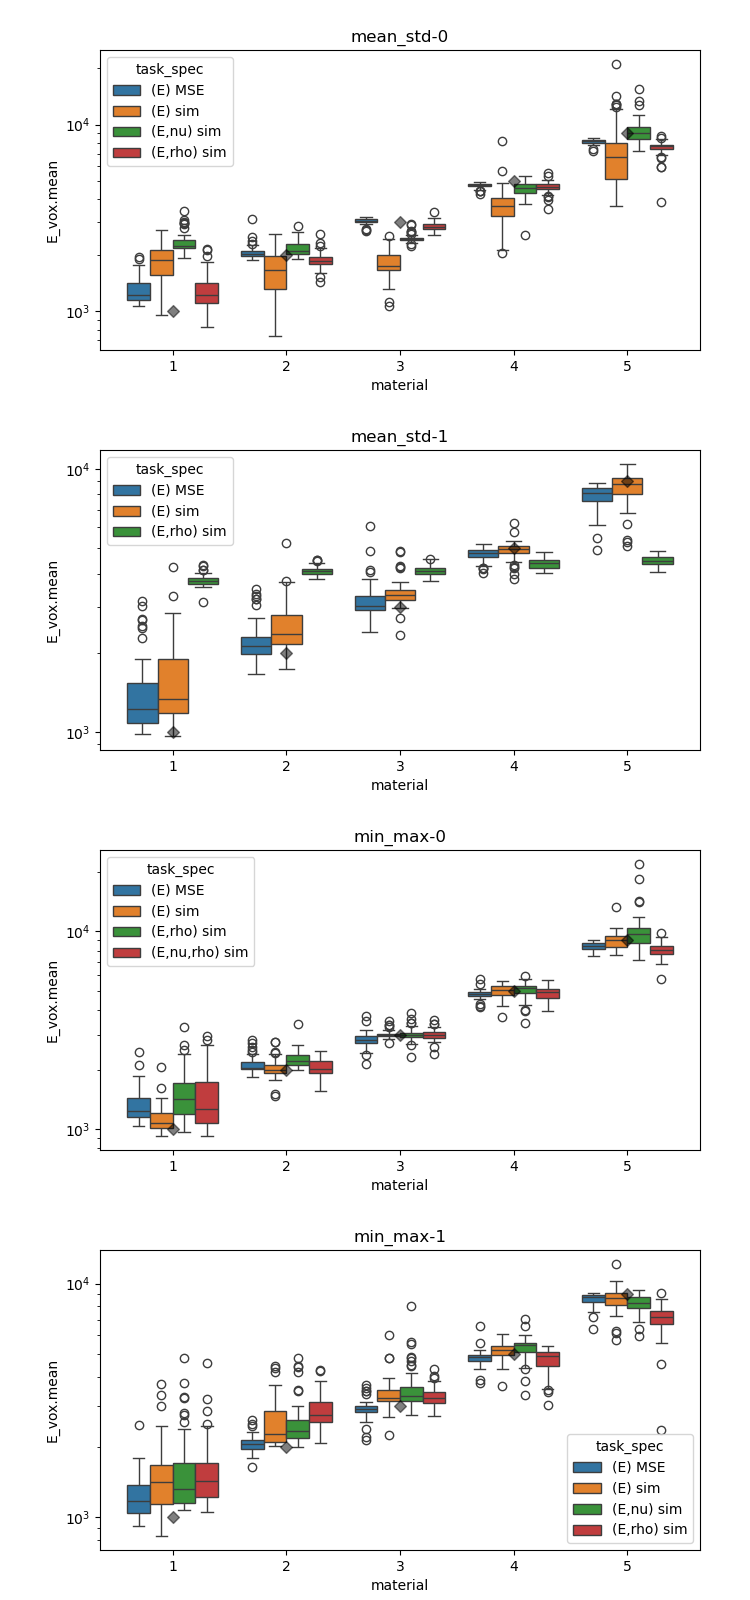

In [132]:
df = mat_df_t

row = 'image_variant'
row_vals = np.unique(df[row])

fig, axes = mpl_viz.subplot_grid(
    4, 1,
    ax_width=6,
    ax_height=3,
    spacing=(1.0, 1.0),
    padding=(1.0, 0.5, 0.5, 0.5)
)

for i, row_val in enumerate(row_vals):
    sns.boxplot(
        df[(df.phase == 'val') & (df.epoch == 15) & (df[row] == row_val)],
        x='material',
        y='E_vox.mean',
        hue='task_spec',
        ax=axes[i,0]
    )
    axes[i,0].set_yscale('log')
    axes[i,0].set_title(row_val)
    axes[i,0].scatter(range(5), [1e3, 2e3, 3e3, 5e3, 9e3], marker='D', color='black', alpha=0.5, zorder=100)


In [134]:
# load optimization baseline
jobs_o = ps.load('2026-02-17_optimize')
ex_df_o = ps.outputs(jobs_o,  output_name='outputs/example_metrics.csv', skip_errors=True)
mat_df_o = ps.outputs(jobs_o,  output_name='outputs/material_metrics.csv', skip_errors=True)

Job 5329d3e9847961a3: file not found
Job 5329d3e9847961a3: file not found


In [135]:
def parse_subjects(path, prefix):
    import ast
    with open(path) as f:
        for line in f:
            if line.startswith(prefix):
                subjs = line[len(prefix):].strip()
                return ast.literal_eval(subjs)

test_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Test subjects:')
test_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Test subjects:')
print(len(test_set1), len(test_set2), test_set1 == test_set2)

val_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Val subjects:')
val_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Val subjects:')
print(len(val_set1), len(val_set2), val_set1 == val_set2)

train_set1 = parse_subjects(jobs_t.iloc[0].stdout_path, prefix='Train subjects:')
train_set2 = parse_subjects(jobs_t.iloc[1].stdout_path, prefix='Train subjects:')
print(len(train_set1), len(train_set2), train_set1 == train_set2)

195 195 True
91 91 False
624 624 False


In [136]:
import project

config = project.core.fileio.load_config('2026-02-02_config.yaml')
config['dataset']['examples']['subjects'] = \
    '/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-26_preprocessed.csv'

examples = project.api.get_examples(config['dataset'])

bad_set = set()
for ex in examples:
    if all(c.startswith('_') for c in ex.metadata['category']):
        bad_set.add(ex.subject)

len(bad_set)

Loading 2026-02-02_config.yaml
Gathering examples


35

In [137]:
len(train_set1) + len(val_set1) + len(test_set1) + len(bad_set)

945

In [138]:
len(train_set1) + len(val_set1)

715

In [140]:
ex_df_t.groupby(['image_variant', 'task_spec', 'epoch', 'phase']).count()

batch  step  loss  loss_base  \
image_variant task_spec     epoch phase                                 
mean_std-0    (E) MSE       0     train    624   624   624        624   
                                  val       91    91    91         91   
                            1     train    624   624   624        624   
                                  val       91    91    91         91   
                            2     train    624   624   624        624   
...                                        ...   ...   ...        ...   
min_max-1     (material) CE 9     train    624   624   624        624   
                                  val       91    91    91         91   
                            10    train    624   624   624        624   
                                  val       91    91    91         91   
                            11    val       91    91    91         91   

                                         loss_ratio  subject  num_voxels  \
image_variant task_spec     epoch phase                                    
mean_std-0    (E) MSE       0     train         624      624         624   
                                  val            91       91          91   
                            1     train         624      624         624   
                                  val            91       91          91   
                            2     train         624      624         624   
...                                             ...      ...         ...   
min_max-1     (material) CE 9     train         624      624         624   
                                  val            91       91          91   
                            10    train         624      624         624   
                                  val            91       91          91   
                            11    val            91       91          91   

                                         source_path  job_name  job_id  ...  \
image_variant task_spec     epoch phase                                 ...   
mean_std-0    (E) MSE       0     train          624       624     624  ...   
                                  val             91        91      91  ...   
                            1     train          624       624     624  ...   
                                  val             91        91      91  ...   
                            2     train          624       624     624  ...   
...                                              ...       ...     ...  ...   
min_max-1     (material) CE 9     train          624       624     624  ...   
                                  val             91        91      91  ...   
                            10    train          624       624     624  ...   
                                  val             91        91      91  ...   
                            11    val             91        91      91  ...   

                                         rho_vox.nrmse  rho_vox.srmse  \
image_variant task_spec     epoch phase                                 
mean_std-0    (E) MSE       0     train              0              0   
                                  val                0              0   
                            1     train              0              0   
                                  val                0              0   
                            2     train              0              0   
...                                                ...            ...   
min_max-1     (material) CE 9     train              0              0   
                                  val                0              0   
                            10    train              0              0   
                                  val                0              0   
                            11    val                0              0   

                                         rho_vox.pcorr  rho_vox.scorr  \
image_variant task_spec     epoch phase            

In [143]:
ex_df_o['val_subject'] = ~ex_df_o['params.subject'].isin(test_set1 | bad_set)

ex_df_o.groupby(['params.targets', 'val_subject']).count()

,,epoch,phase,batch,step,loss,subject,num_voxels,E_vox.mean,E_vox.rms,E_vox.rmse,...,nu_vox.rms,nu_cell.mean,nu_cell.rms,rho_vox.mean,rho_vox.rms,rho_vox.rmse,rho_vox.nrmse,rho_vox.srmse,rho_vox.pcorr,rho_vox.scorr
params.targets,val_subject,,,,,,,,,,,,,,,,,,,,,
"[E,nu,rho]",False,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,0,0,0
"[E,nu]",False,194,194,194,194,194,194,194,194,194,194,...,194,194,194,0,0,0,0,0,0,0
"[E,rho]",False,195,195,195,195,195,195,195,195,195,195,...,0,0,0,195,195,195,195,0,0,0
[E],False,195,195,195,195,195,195,195,195,195,195,...,0,0,0,0,0,0,0,0,0,0


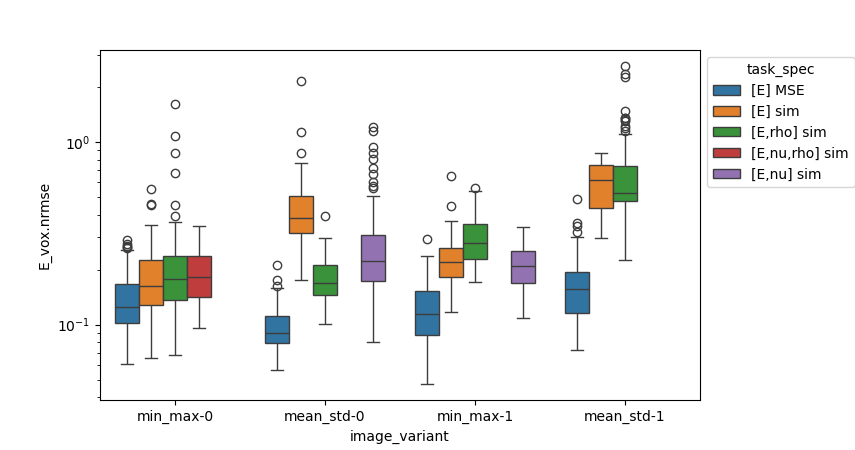

In [165]:
df = ex_df_t

fig, axes = mpl_viz.subplot_grid(
    1, 1,
    ax_width=6,
    ax_height=3.5,
    spacing=(1.0, 1.0),
    padding=(1.0, 1.55, 0.5, 0.5)
)
sns.boxplot(
    df[(df.phase == 'val') & (df.epoch == 15)],
    x='image_variant',
    y='E_vox.nrmse',
    hue='task_spec',
    ax=axes[0,0]
)
axes[0,0].set_yscale('log')
axes[0,0].legend(bbox_to_anchor=[1,1], title='task_spec')

In [144]:
ex_df_o.subject.isin(val_set1).any()

np.False_

In [145]:
ex_df_t.task_spec

0          (material) CE
1          (material) CE
2          (material) CE
3          (material) CE
4          (material) CE
               ...      
225883    (E,nu,rho) sim
225884    (E,nu,rho) sim
225885    (E,nu,rho) sim
225886    (E,nu,rho) sim
225887    (E,nu,rho) sim
Name: task_spec, Length: 225888, dtype: object

In [151]:
ex_df_t['task_spec'] = ex_df_t['task_spec'].map(lambda x: x.replace('(', '[').replace(')', ']'))
ex_df_o['task_spec'] = ex_df_o['params.targets'].map(lambda x: f'{x} opt')

In [158]:
%autoreload
ex_df = pd.concat([
    ex_df_t[(ex_df_t.phase == 'val') & (ex_df_t.epoch == 10) & (ex_df_t.image_variant == 'mean_std-1')],
    ex_df_o
])
ex_df.groupby(['phase', 'task_spec']).describe()

epoch                                           \
                         count  mean  std   min   25%   50%   75%   max   
phase    task_spec                                                        
optimize [E,nu,rho] opt  195.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
         [E,nu] opt      194.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
         [E,rho] opt     195.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
         [E] opt         195.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   
val      [E,rho] sim      91.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
         [E] MSE          91.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
         [E] sim          91.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
         [material] CE    91.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   

                         batch        ... nu_cell.rms           data_size  \
                         count  mean  ...         75%       max     count   
phase    task_spec                    ...                                   
optimize [E,nu,rho] opt  195.0   0.0  ...    0.405058  0.492947       0.0   
         [E,nu] opt      194.0   0.0  ...    0.403066  0.489824       0.0   
         [E,rho] opt     195.0   0.0  ...         NaN       NaN       0.0   
         [E] opt         195.0   0.0  ...         NaN       NaN       0.0   
val      [E,rho] sim      91.0  45.0  ...         NaN       NaN      91.0   
         [E] MSE          91.0  45.0  ...         NaN       NaN      91.0   
         [E] sim          91.0  45.0  ...         NaN       NaN      91.0   
         [material] CE    91.0  45.0  ...         NaN       NaN      91.0   

                                                                        
                          mean  std    min    25%    50%    75%    max  
phase    task_spec                                                      
optimize [E,nu,rho] opt    NaN  NaN    NaN    NaN    NaN    NaN    NaN  
         [E,nu] opt        NaN  NaN    NaN    NaN    NaN    NaN    NaN  
         [E,rho] opt       NaN  NaN    NaN    NaN    NaN    NaN    NaN  
         [E] opt           NaN  NaN    NaN    NaN    NaN    NaN    NaN  
val      [E,rho] sim     945.0  0.0  945.0  945.0  945.0  945.0  945.0  
         [E] MSE         945.0  0.0  945.0  945.0  945.0  945.0  945.0  
         [E] sim         945.0  0.0  945.0  945.0  945.0  945.0  945.0  
         [material] CE   945.0  0.0  945.0  945.0  945.0  945.0  945.0  

[8 rows x 520 columns]

In [168]:
%autoreload
mat_df_t['task_spec'] = mat_df_t['task_spec'].map(lambda x: x.replace('(', '[').replace(')', ']'))
mat_df_o['task_spec'] = mat_df_o['params.targets'].map(lambda x: f'{x} opt')

mat_df = pd.concat([
    mat_df_t[(mat_df_t.phase == 'val') & (mat_df_t.epoch == 10) & (mat_df_t.image_variant == 'mean_std-1')],
    mat_df_o
])
mat_df.groupby(['phase', 'task_spec', 'material']).describe()

epoch                                     \
                                  count  mean  std   min   25%   50%   75%   
phase    task_spec      material                                             
optimize [E,nu,rho] opt 1         118.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        2         113.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        3         121.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        4         111.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        5         116.0   0.0  0.0   0.0   0.0   0.0   0.0   
         [E,nu] opt     1         117.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        2         112.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        3         120.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        4         110.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        5         115.0   0.0  0.0   0.0   0.0   0.0   0.0   
         [E,rho] opt    1         118.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        2         113.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        3         121.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        4         111.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        5         116.0   0.0  0.0   0.0   0.0   0.0   0.0   
         [E] opt        1         118.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        2         113.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        3         121.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        4         111.0   0.0  0.0   0.0   0.0   0.0   0.0   
                        5         116.0   0.0  0.0   0.0   0.0   0.0   0.0   
val      [E,rho] sim    1          53.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        2          56.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        3          56.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        4          50.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        5          60.0  10.0  0.0  10.0  10.0  10.0  10.0   
         [E] MSE        1          59.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        2          56.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        3          58.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        4          53.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        5          64.0  10.0  0.0  10.0  10.0  10.0  10.0   
         [E] sim        1          55.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        2          57.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        3          50.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        4          54.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        5          58.0  10.0  0.0  10.0  10.0  10.0  10.0   
         [material] CE  1          48.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        2          54.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        3          65.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        4          54.0  10.0  0.0  10.0  10.0  10.0  10.0   
                        5          54.0  10.0  0.0  10.0  10.0  10.0  10.0   

                                        batch             ... nu_cell.rms  \
                                   max  count       mean  ...         75%   
phase    task_spec      material                          ...               
optimize [E,nu,rho] opt 1          0.0  118.0   0.000000  ...    0.407666   
                        2          0.0  113.0   0.000000  ...    0.405292   
                        3          0.0  121.0   0.000000  ...    0.405840   
                        4          0.0  111.0   0.000000  ...    0.407426   
                        5          0.0  116.0   0.000000  ...    0.409749   
         [E,nu] opt     1          0.0  117.0   0.000000  ...  

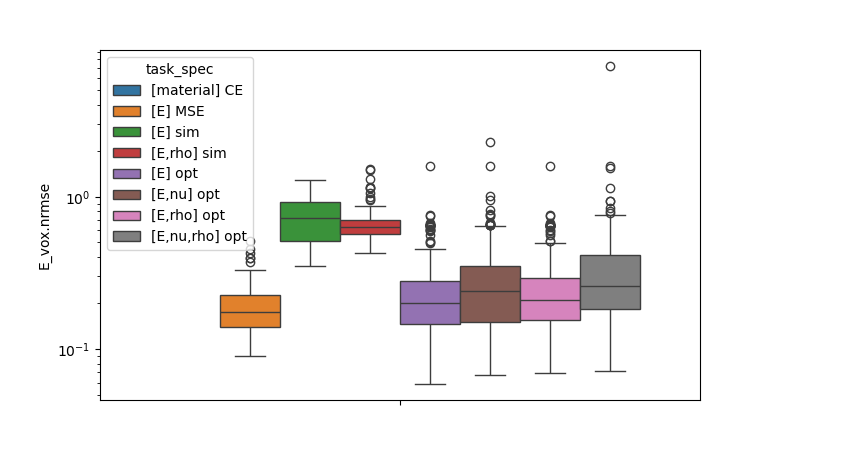

In [169]:
df = ex_df

fig, axes = mpl_viz.subplot_grid(
    1, 1,
    ax_width=6,
    ax_height=3.5,
    spacing=(1.0, 1.0),
    padding=(1.0, 1.55, 0.5, 0.5)
)
sns.boxplot(
    df,
    hue='task_spec',
    y='E_vox.nrmse',
    ax=axes[0,0]
)
axes[0,0].set_yscale('log')

2


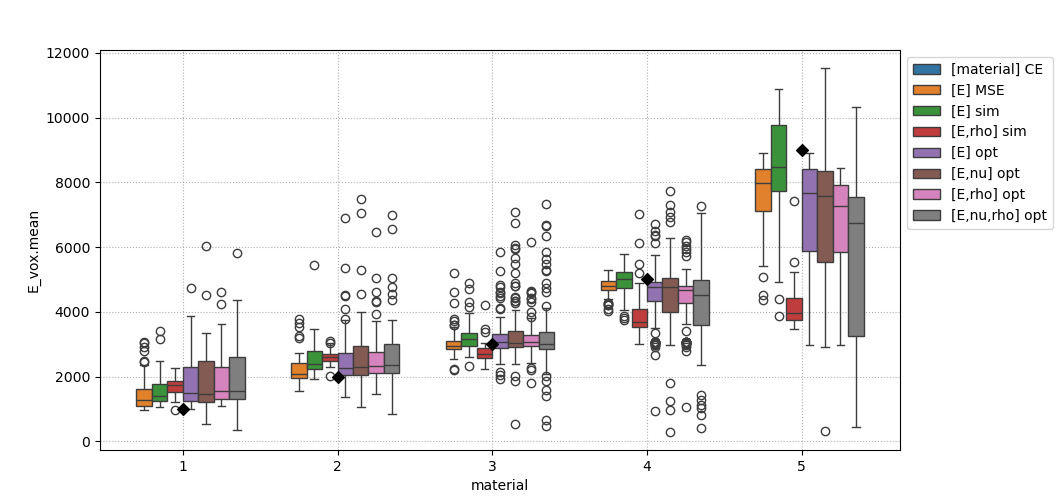

In [192]:
df = mat_df

fig, axes = mpl_viz.subplot_grid(
    1, 1,
    ax_width=8,
    ax_height=4,
    spacing=(1.0, 1.0),
    padding=(1.0, 1.55, 0.5, 0.5)
)

is_outlier = df['E_vox.mean'] > 1.4e4
print(is_outlier.sum())

sns.boxplot(
    df[~is_outlier],
    x='material',
    y='E_vox.mean',
    hue='task_spec',
    ax=axes[0,0]
)
#axes[0,0].set_yscale('log')
axes[0,0].scatter(range(5), [1e3, 2e3, 3e3, 5e3, 9e3], marker='D', color='black', zorder=100)
axes[0,0].legend(bbox_to_anchor=[1,1])
axes[0,0].grid(linestyle=':')

/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
/var/tmp/ipykernel_48480/903900530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

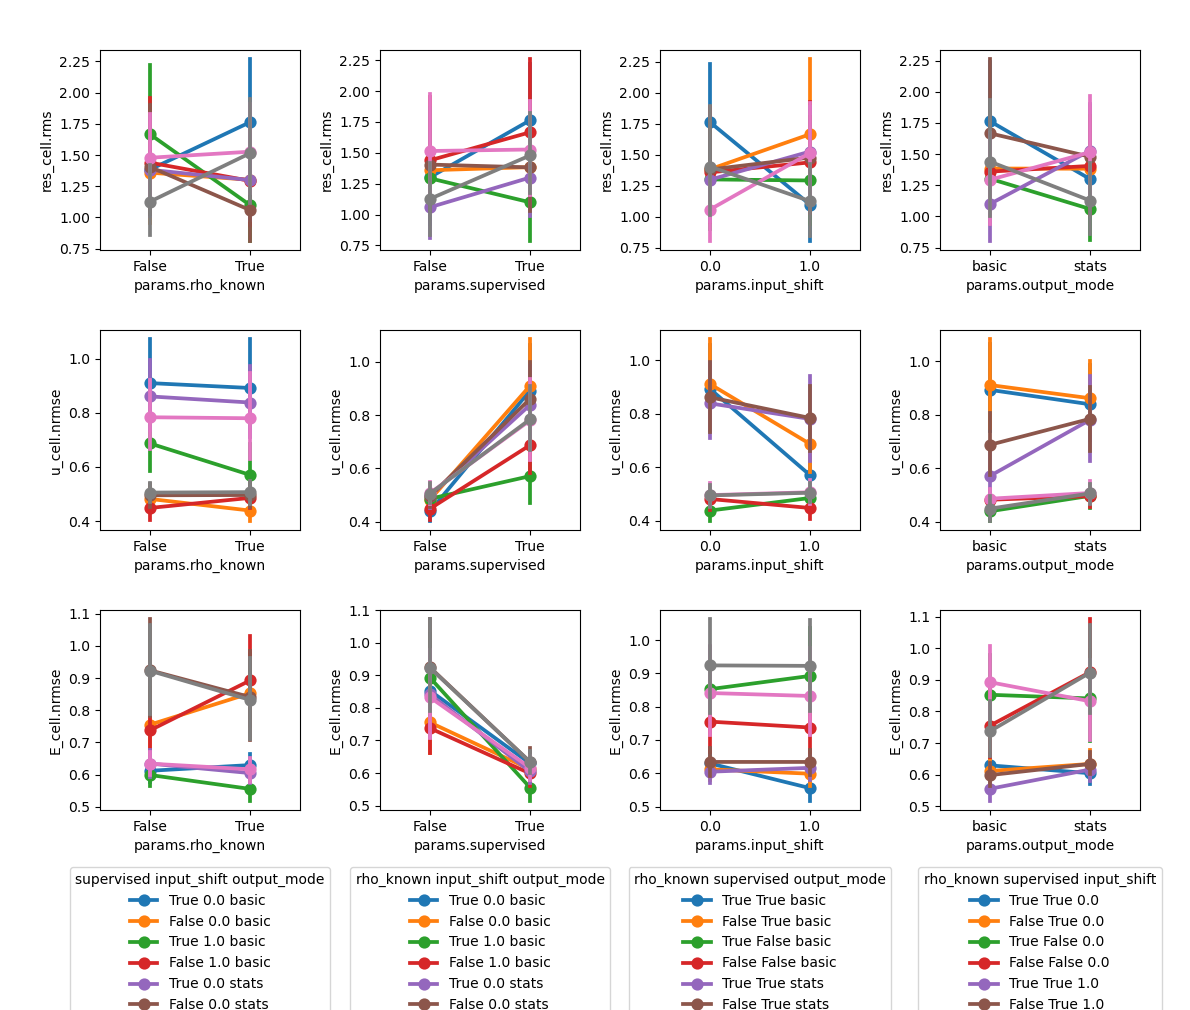

In [30]:
def add_group_column(df, cols, sep=' '):
    new_col = sep.join(cols)
    df[new_col] = df[cols].astype(str).agg(sep.join, axis=1)
    return new_col

def plot(df, x, y):
    xs = x if isinstance(x, list) else [x]
    ys = y if isinstance(y, list) else [y]
    n_cols = len(xs)
    n_rows = len(ys)
    fig, axes = mpl_viz.subplot_grid(
        n_rows, n_cols,
        ax_height=2,
        ax_width=2,
        padding=[1.0, 0.5, 2.0, 0.5], 
        spacing=[0.8, 0.8]
    )
    for i, x in enumerate(xs):
        hue = add_group_column(df, [c for c in xs if c != x])
        for j, y in enumerate(ys):
            ax = axes[j,i]
            sns.pointplot(df, x=x, y=y, hue=hue, ax=ax, legend=True)
            ax.get_legend().remove()
            if j + 1 == n_rows:
                handles, labels = ax.get_legend_handles_labels()
                title = hue.replace('params.', '')
                ax.legend(handles, labels, loc='upper center', bbox_to_anchor=[0.5, -0.25], title=title)

plot(
    ex_df[ex_df.method != 'FEM-opt'],
    x=['params.rho_known', 'params.supervised', 'params.input_shift', 'params.output_mode'],
    y=['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']
)

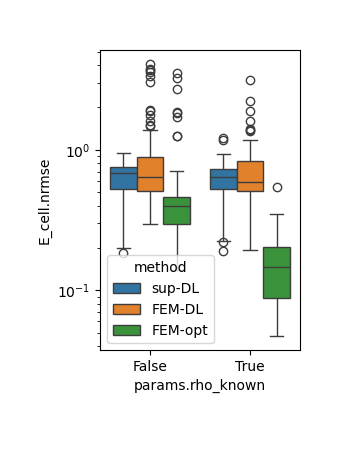

In [105]:
y_cols = ['E_cell.nrmse'] #['res_cell.rms', 'u_cell.nrmse', 'E_cell.nrmse']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=2,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        ex_df[
            (ex_df['params.bounds_mode'].fillna('none') == 'none')
        ],
        hue='method',
        x='params.rho_known',
        y=y_col,
        ax=axes[0,i]
    )

for ax in axes.flatten():
    ax.set_yscale('log')
    #ax.set_ylim(0.01, 10.0)
    #ax.legend(loc='upper left', title='params.supervised')

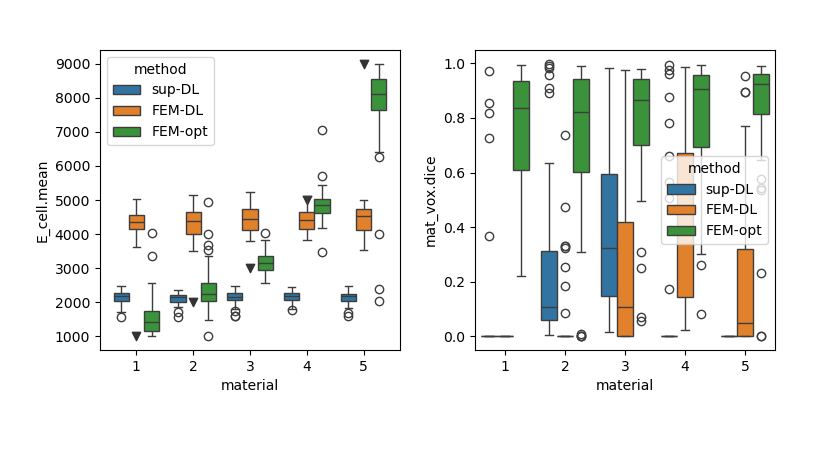

In [106]:
y_cols = ['E_cell.mean', 'mat_vox.dice'] #, 'E_cell.nrmse', 'mat_vox.dice']

fig, axes = mpl_viz.subplot_grid(
    1, len(y_cols),
    ax_height=3,
    ax_width=3,
    padding=[1.0, 0.5, 1.0, 0.5], 
    spacing=[0.75, 0.75]
)

for i, y_col in enumerate(y_cols):
    sns.boxplot(
        mat_df[mat_df['params.rho_known']],
        hue='method',
        x='material',
        y=y_col,
        ax=axes[0,i]
    )
    if y_col == 'E_cell.mean':
        axes[0,i].scatter(range(5), [1e3, 2e3, 3e3, 5e3, 9e3], marker='v', c='0.2')


In [89]:
from IPython.display import Image

In [98]:
job = jobs_t[
    jobs_t['params.rho_known'] &
    jobs_t['params.supervised'] &
    (jobs_t['params.bounds_mode'] == 'none')
].iloc[0]
job

job_name                                               099f680c4b90ae80
job_state                                                       RUNNING
n_submits                                                             1
job_id                                                         37172077
node_id                                                            v002
runtime                                                         8:54:17
stdout                Loading /ocean/projects/asc170022p/mtragoza/lu...
stderr                  self.fig.tight_layout()\n/ocean/projects/asc...
base_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir              /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path           /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir               /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path           /ocean/projects/asc170022p/mtragoza/lung-p

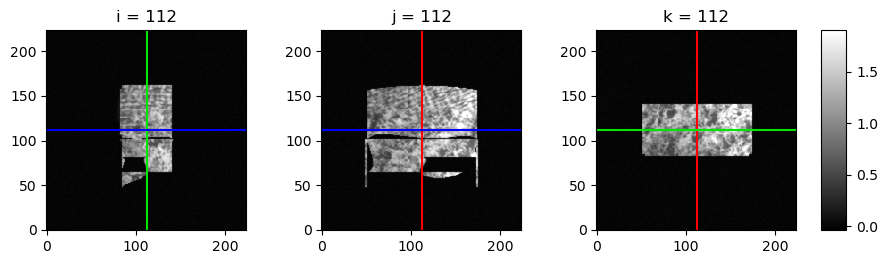

In [99]:
Image(filename=f'{job.work_dir}/outputs/image_viewer.png')

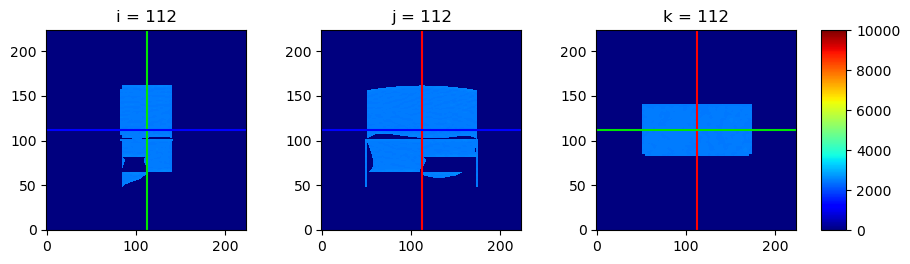

In [100]:
Image(filename=f'{job.work_dir}/outputs/E_pred_viewer.png')

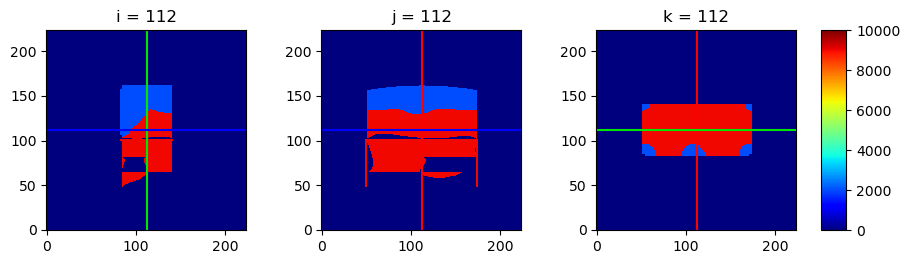

In [101]:
Image(filename=f'{job.work_dir}/outputs/E_true_viewer.png')

/var/tmp/ipykernel_82813/916136722.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]


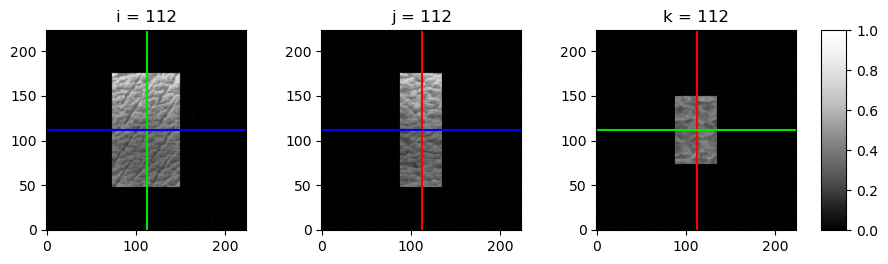

In [53]:
job_name = df.set_index(param_cols).loc[True, False, 3.0, 1.0].job_name.iloc[0]
Image(filename=f'{base_dir}/{job_name}/outputs/image_viewer.png')

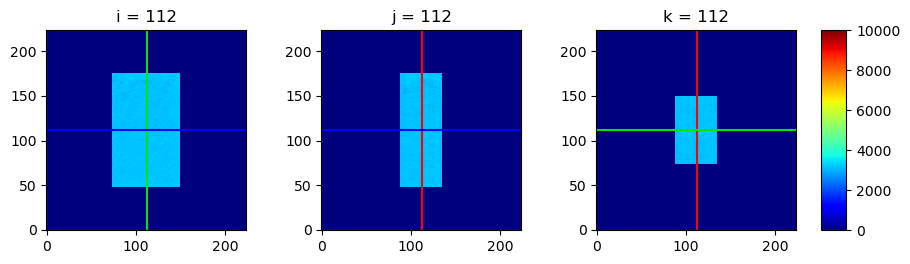

In [54]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_pred_viewer.png')

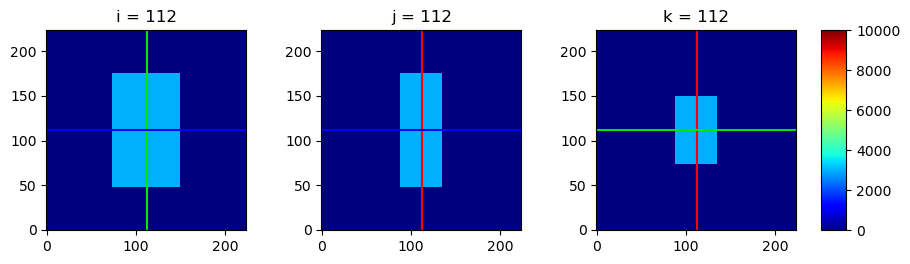

In [55]:
Image(filename=f'{base_dir}/{job_name}/outputs/E_true_viewer.png')